<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimation of Prediction for Getting Heart Disease Using Logistic Regression Model of Machine Learnig

In [125]:
from google.colab import files
uploaded = files.upload()

Saving framingham_data.xlsx to framingham_data (5).xlsx


In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
heart_data = pd.read_excel("framingham_data.xlsx")
print(heart_data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

<ipython-input-127-ceb043e0d956>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="prevalentStroke", data= heart_data,palette=custom_colors)


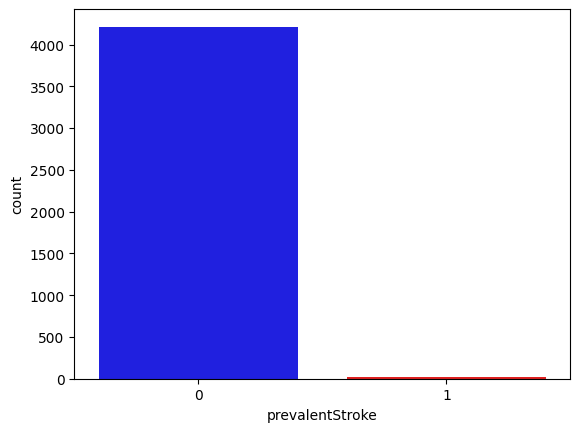

In [127]:
#Comparing people with and without Prevalent Stroke
# Define a custom list of colors
custom_colors = ['blue', 'red']
sns.countplot(x="prevalentStroke", data= heart_data,palette=custom_colors)
plt.show()

<ipython-input-128-4e46207bf933>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="prevalentHyp", data= heart_data,palette=custom_colors)


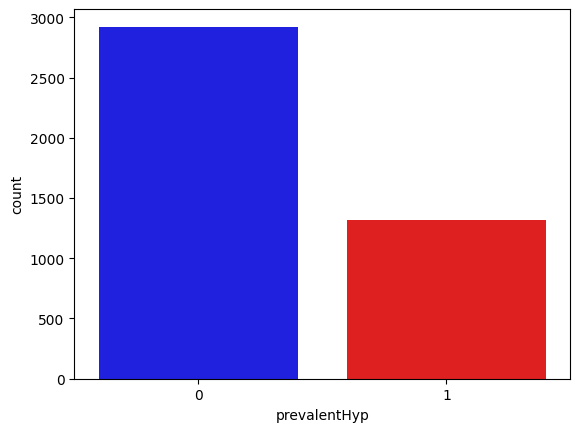

In [128]:
#Comparing people with and without Prevalent Hypertension
# Define a custom list of colors
custom_colors = ['blue', 'red']
sns.countplot(x="prevalentHyp", data= heart_data,palette=custom_colors)
plt.show()

<Axes: ylabel='Frequency'>

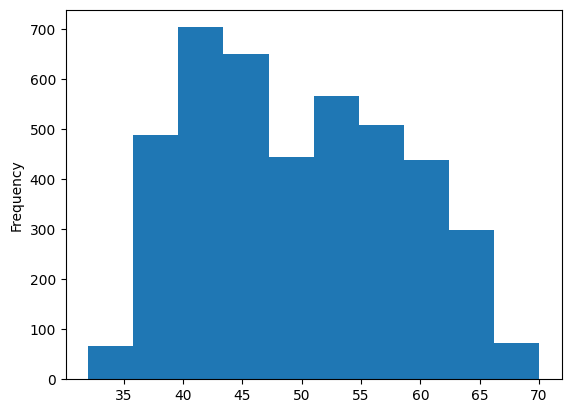

In [129]:
#Comparing the Distribution of Ages
heart_data['age'].plot.hist()

<Axes: ylabel='Frequency'>

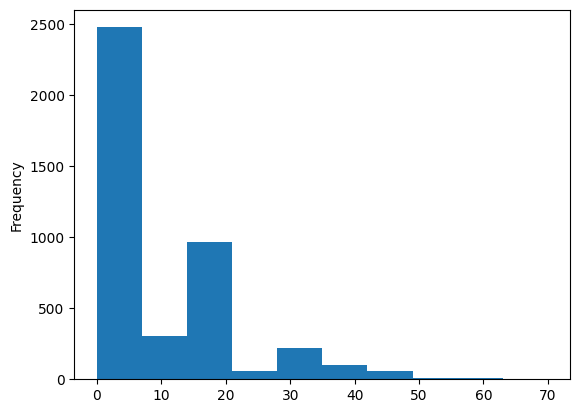

In [130]:
#Comparing the distribution of people with Cigarettes per Day
heart_data['cigsPerDay'].plot.hist()

<Axes: ylabel='Frequency'>

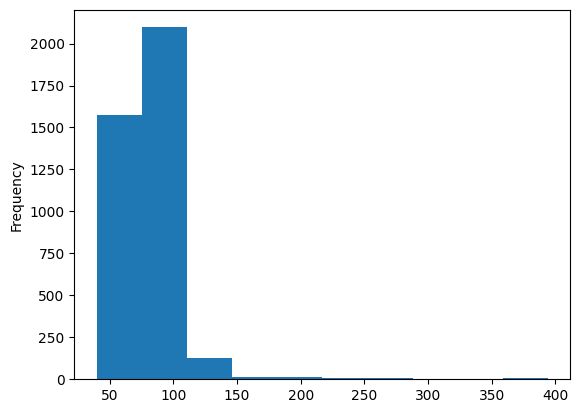

In [131]:
#Comparing the distribution of glucose among individuals
heart_data['glucose'].plot.hist()

2.Finding Null Values

In [132]:
#finding null values
heart_data.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [133]:
#finding null values across segments
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

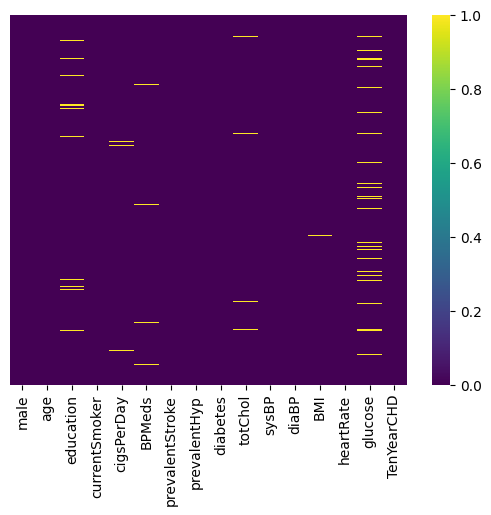

In [134]:
#Plotting a heatmap to indicate null values across columns
sns.heatmap(heart_data.isnull(), yticklabels= False, cmap='viridis')

In [135]:
heart_data.drop("education", axis=1,inplace=True)
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [136]:
m= np.mean(heart_data['glucose'])
print(m)

81.96675324675324


3.Replacing Null Values

In [137]:
heart_data['glucose'].replace(to_replace= np.nan, value= m, inplace= True)
heart_data['BMI'].replace(to_replace= np.nan, value= 25, inplace= True)
heart_data['cigsPerDay'].replace(to_replace= np.nan, value= 5, inplace= True)
heart_data['heartRate'].replace(to_replace= np.nan, value= 90, inplace= True)
heart_data['BPMeds'].replace(to_replace= np.nan, value= 0, inplace= True)
heart_data.drop('currentSmoker', axis= 1, inplace= True)

<Axes: ylabel='Frequency'>

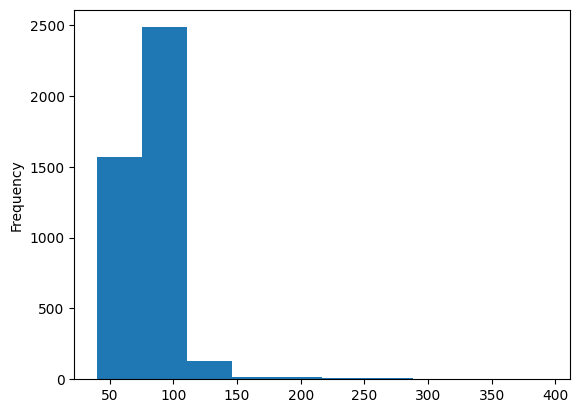

In [138]:
heart_data['glucose'].plot.hist()

In [139]:
heart_data.head(10)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<Axes: >

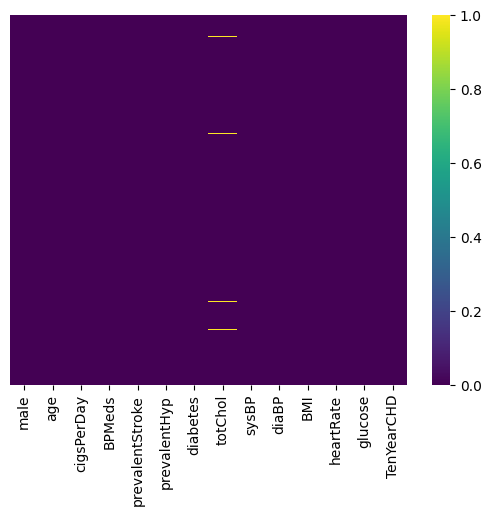

In [140]:
#Plotting a heatmap
sns.heatmap(heart_data.isnull(), yticklabels= False, cmap='viridis')

In [141]:
heart_data['totChol'].replace(to_replace= np.nan, value= 247.0, inplace=True)
heart_data.drop("BPMeds", axis=1, inplace=True)

<Axes: >

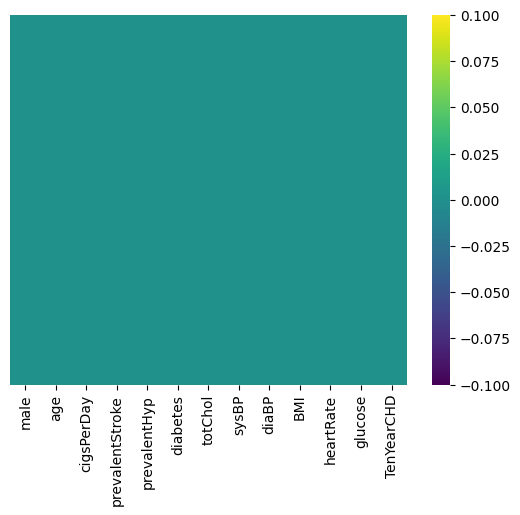

In [142]:
sns.heatmap(heart_data.isnull(), yticklabels=False, cmap="viridis")

In [143]:
heart_data.isnull().sum()

male               0
age                0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<ipython-input-144-a19a2272ed9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="TenYearCHD",data= heart_data,palette=custom_colors)


<Axes: xlabel='TenYearCHD', ylabel='count'>

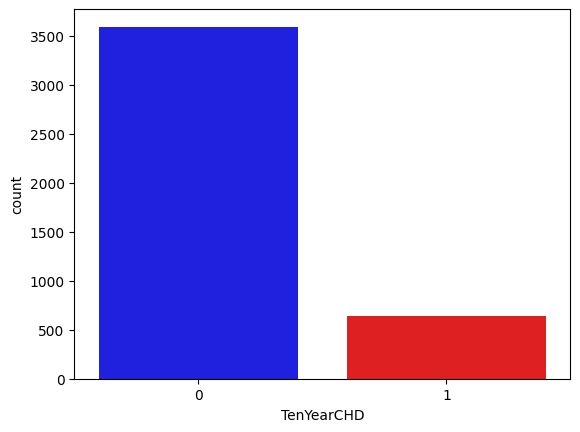

In [144]:
#Comparing people with and without Ten Year CHD
# Define a custom list of colors
custom_colors = ['blue', 'red']
sns.countplot(x="TenYearCHD",data= heart_data,palette=custom_colors)

In [145]:
X=heart_data.drop("TenYearCHD", axis=1)
y=heart_data['TenYearCHD'].values
print(y)

[0 0 0 ... 0 0 0]


4.Test and Train


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=15)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

#Normalize the data attributes for the Iris dataset
from sklearn.datasets import load_iris
from sklearn import preprocessing
#load the iris dataset
iris = load_iris()
print(iris.data.shape)

#Separate the data from the targetattributes
X= iris.data
y= iris.target

#Normalize the data atrributes
normalized_X =preprocessing.normalize(X)

(150, 4)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8525943396226415
Precision Score : 0.8571428571428571
Recall Score : 0.046153846153846156
F1 Score : 0.08759124087591241
Confusion Matrix : 
[[717   1]
 [124   6]]


In [148]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,15,100]}
grid_clf_acc= GridSearchCV(clf,param_grid = grid_values,scoring= 'accuracy')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = grid_clf_acc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [149]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8514150943396226